# To build a model for training and testing:

In [1]:
#pip install tensorflow

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
dir_name_train_Healthy='dataset/train/Healthy'
dir_name_train_septoria='dataset/train/septoria'
dir_name_tran_stripe_rust='dataset/train/stripe_rust'

In [6]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [7]:
def Images_details_Print_data(data, path):
    print("====== images in: " ,path)
    for k, v in data.items():
        print(" %s \t %s" % (k,v))

def Images_details(path):
    files = [f for f in glob.glob(path + '/*', recursive=True)] #changes I made
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)



Trained data for Healthy:

====== images in:  dataset/train/Healthy
 images_count 	 84
 min_width 	 179
 max_width 	 2988
 min_height 	 168
 max_height 	 2988



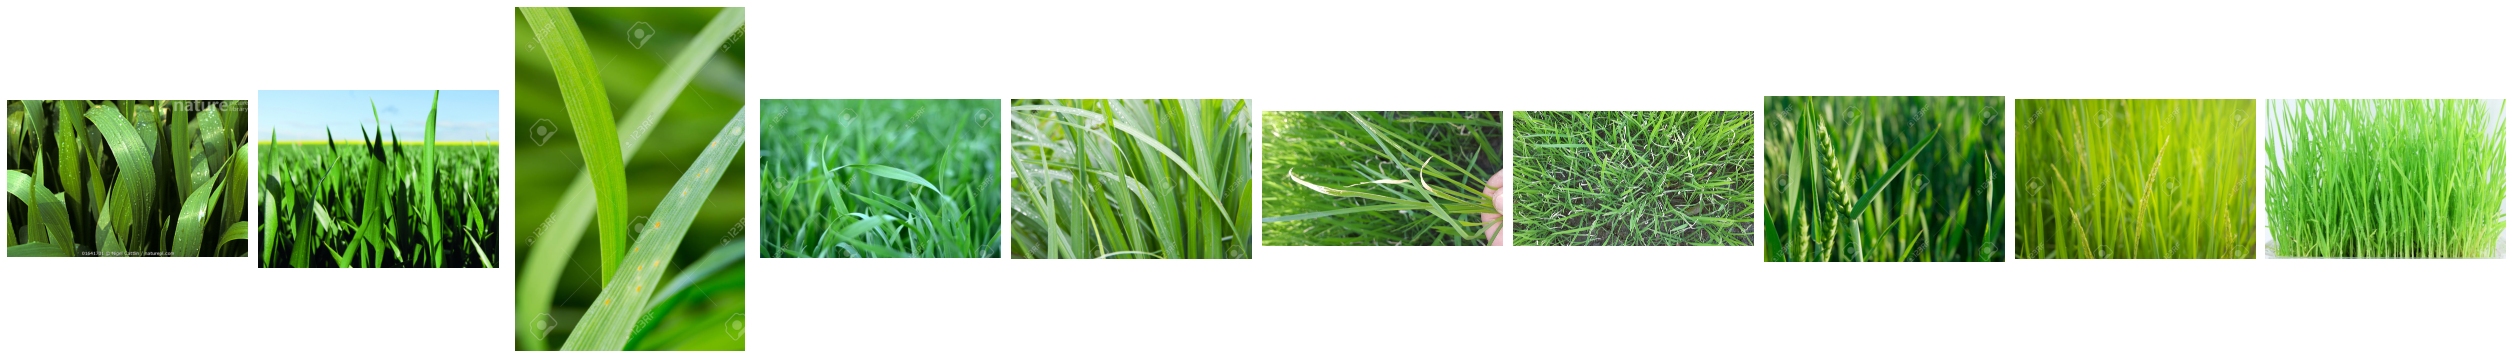

In [8]:
print("")
print("Trained data for Healthy:")
print("")

Images_details(dir_name_train_Healthy)
print("")
plot_images(dir_name_train_Healthy, 10)


Trained data for septoria:

====== images in:  dataset/train/septoria
 images_count 	 122
 min_width 	 17
 max_width 	 5999
 min_height 	 95
 max_height 	 5999



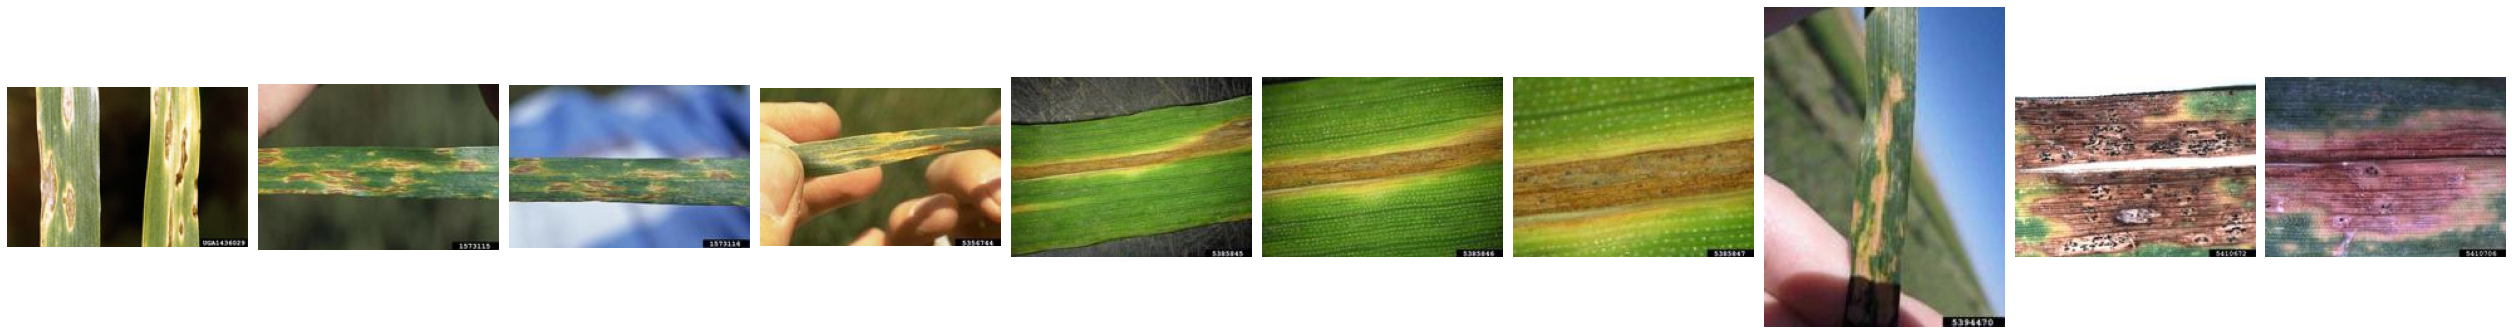

In [9]:
print("")
print("Trained data for septoria:")
print("")

Images_details(dir_name_train_septoria)
print("")
plot_images(dir_name_train_septoria, 10)


Trained data for Stripe Rust:

====== images in:  dataset/train/stripe_rust
 images_count 	 102
 min_width 	 1748
 max_width 	 6000
 min_height 	 3203
 max_height 	 5999



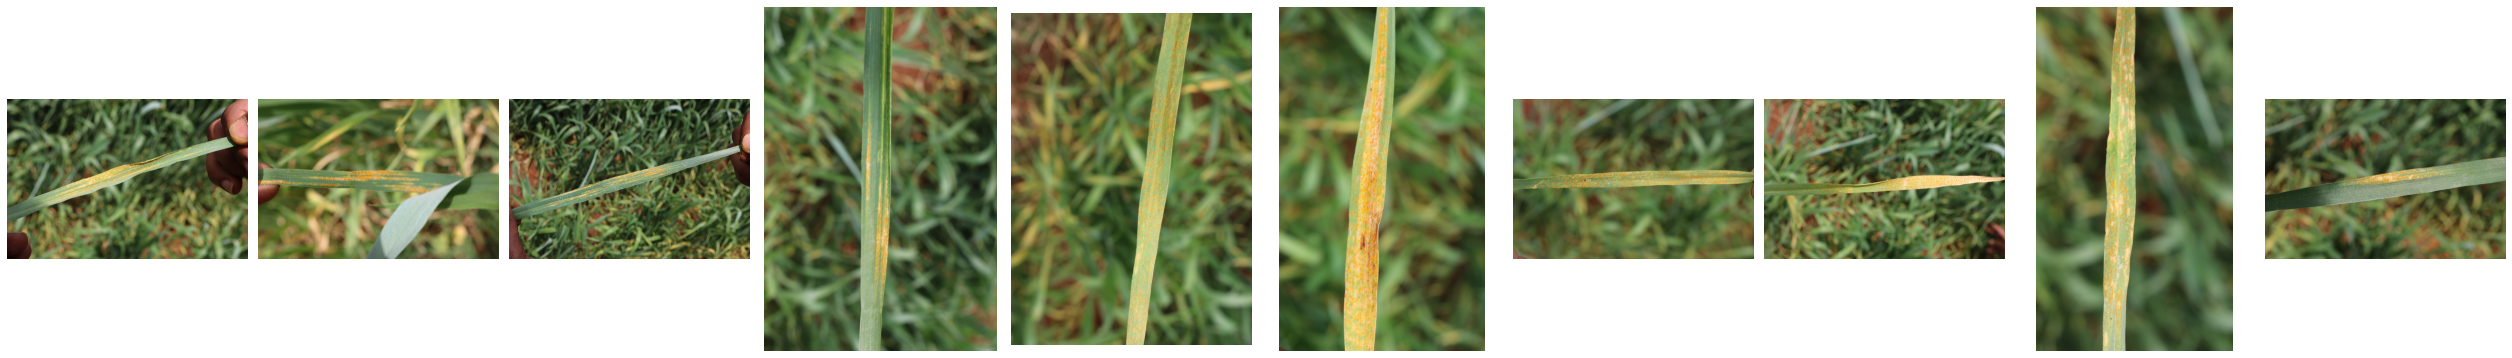

In [10]:
print("")
print("Trained data for Stripe Rust:")
print("")

Images_details(dir_name_tran_stripe_rust)
print("")
plot_images(dir_name_tran_stripe_rust, 10)

In [11]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(250,250,3),activation="relu"))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38,activation="relu"))


In [12]:
Classifier.add(Dense(3,activation="softmax"))
Classifier.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=['accuracy'])


In [13]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1./255)

In [14]:
training_set=train_datagen.flow_from_directory('Dataset/train',target_size=(250,250),batch_size=32,class_mode='categorical')
test_set= test_datagen.flow_from_directory('Dataset/test',target_size=(250,250),batch_size=32,class_mode='categorical')

Found 308 images belonging to 3 classes.
Found 78 images belonging to 3 classes.


In [15]:
img_dims =150
epochs = 5
batch_size = 32

In [16]:
#not necessary
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [17]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/5
9/9 [==============================] - 65s 7s/step - loss: 20.9390 - accuracy: 0.4965 - val_loss: 0.5756 - val_accuracy: 0.7656
Epoch 2/5
9/9 [==============================] - 47s 5s/step - loss: 1.8310 - accuracy: 0.6558 - val_loss: 0.9014 - val_accuracy: 0.7500
Epoch 3/5
9/9 [==============================] - 48s 5s/step - loss: 1.3872 - accuracy: 0.7319 - val_loss: 0.1498 - val_accuracy: 0.9219
Epoch 4/5
9/9 [==============================] - 45s 5s/step - loss: 0.5179 - accuracy: 0.8551 - val_loss: 0.5330 - val_accuracy: 0.8125
Epoch 5/5
9/9 [==============================] - 45s 5s/step - loss: 0.9369 - accuracy: 0.7464 - val_loss: 0.1426 - val_accuracy: 0.9375


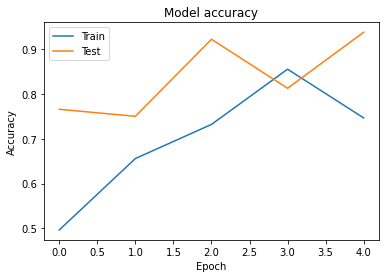

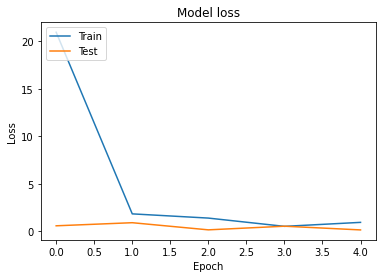

In [18]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()